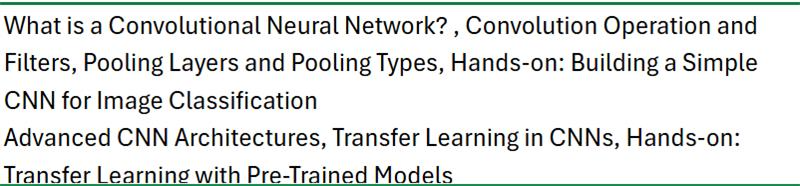

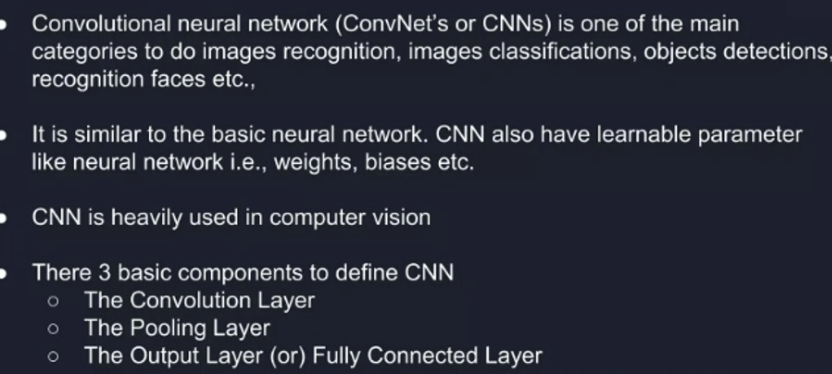

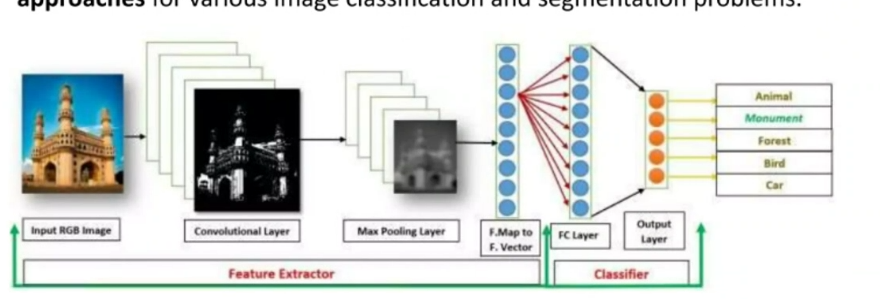

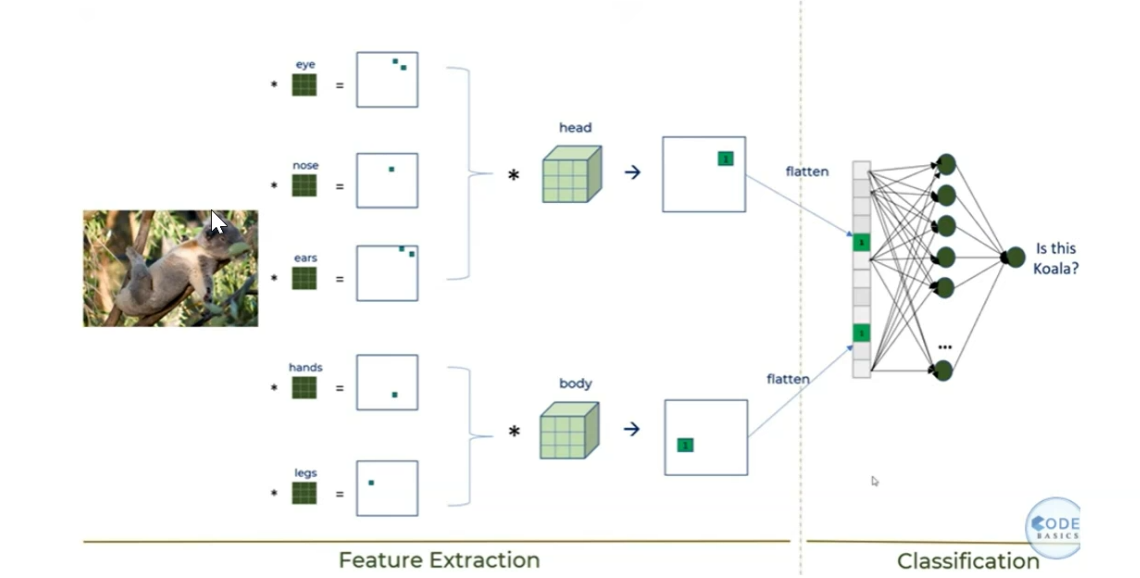

In [24]:
# !pip show keras #was checking if I have keras

In [25]:
from keras.datasets import mnist
(X_train, y_train) ,(X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape) # too many dimensions, need to flatten it a bit

(60000, 28, 28)


In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, Conv2D, MaxPool2D,Flatten
from keras import utils

In [28]:
import matplotlib.pyplot as plt

In [29]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

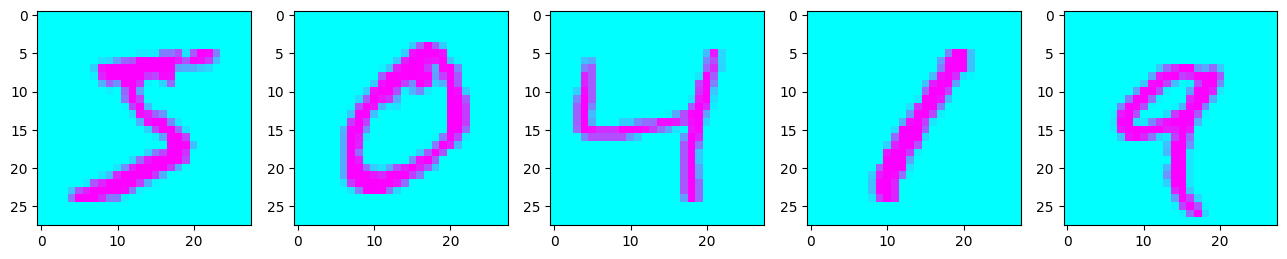

In [30]:
fig, (a0,a1,a2,a3,a4) = plt.subplots(1,5)
fig.set_size_inches(16,3)
plt.cool()
a0.imshow(X_train[0])
a1.imshow(X_train[1])
a2.imshow(X_train[2])
a3.imshow(X_train[3])
a4.imshow(X_train[4])

In [31]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [32]:
# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype("float32")

In [33]:
X_train /= 255
X_test /= 255

In [34]:
n_classes = 10 # because we have 10 digits
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
Y_train.shape

(60000, 10)

In [37]:
model = Sequential()

In [39]:
model.add(
    Conv2D(
        filters=25,
        kernel_size=(3,3),
        strides=(1,1),
        padding='valid',
        activation='relu',
        input_shape=(28,28,1)
    )
)
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [40]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [41]:
model.fit(X_train,Y_train,batch_size=128, epochs=10, validation_data=(X_test,Y_test))

Epoch 1/10
469/469 [==============================] - 49s 99ms/step - loss: 0.1918 - accuracy: 0.9445 - val_loss: 0.0713 - val_accuracy: 0.9771
Epoch 2/10
469/469 [==============================] - 51s 110ms/step - loss: 0.0578 - accuracy: 0.9829 - val_loss: 0.0598 - val_accuracy: 0.9804
Epoch 3/10
469/469 [==============================] - 40s 85ms/step - loss: 0.0348 - accuracy: 0.9896 - val_loss: 0.0507 - val_accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0218 - accuracy: 0.9938 - val_loss: 0.0487 - val_accuracy: 0.9839
Epoch 5/10
469/469 [==============================] - 33s 69ms/step - loss: 0.0139 - accuracy: 0.9960 - val_loss: 0.0523 - val_accuracy: 0.9837
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0093 - accuracy: 0.9974 - val_loss: 0.0518 - val_accuracy: 0.9837
Epoch 7/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0060 - accuracy: 0.9983 - val_loss: 0.0523 - val_accuracy

In [ ]:
# # code by maam
# from keras.datasets import mnist
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
# from tensorflow.keras import utils
# from sklearn.metrics import accuracy_score

# (X_train, y_train), (X_test, y_test) = mnist.load_data()

# X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# X_train = X_train.astype("float32")
# X_test = X_test.astype("float32")

# X_train /= 255
# X_test /= 255

# n_classes = 10
# print("Shape before one-hot encoding: ", y_train.shape)
# Y_train = np_utils.to_categorical(y_train, n_classes)
# Y_test = np_utils.to_categorical(y_test, n_classes)
# print("Shape after one-hot encoding: ", Y_train.shape)

# model = Sequential()
# model.add(
#     Conv2D(
#         25,
#         kernel_size=(3, 3),
#         strides=(1, 1),
#         padding="valid",
#         activation="relu",
#         input_shape=(28, 28, 1),
#     )
# )
# model.add(MaxPool2D(pool_size=(1, 1)))
# model.add(Flatten())
# model.add(Dense(100, activation="relu"))
# model.add(Dense(10, activation="softmax"))
# model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))